In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Configurações
np.random.seed(50)
x = np.linspace(0, 200, 150)

# Flutuação quântica típica (ruído)
fluctuation = np.random.uniform(-1.02, 1, size=x.shape)

# Região espremida (squeezing)
for i in range(35,50):
    fluctuation[i] *= 2.5

for i in range(100,120):
    fluctuation[i] *= 0.3

plt.figure(figsize=(12,10))
plt.plot(x, fluctuation)
plt.axhline(y=1, color='black',linestyle='--', linewidth=3)
plt.axhline(y=-1, color='black', linewidth=3, linestyle='dashed')
#plt.axhline(y=0, color='black', linewidth=3)
plt.annotate('', xy=(210, 0), xytext=(-5, 0),
            arrowprops=dict(arrowstyle='->,head_length=1,head_width=0.5', color='black', linewidth=3))
plt.annotate('', xy=(15, 2.25), xytext=(15, -2),
            arrowprops=dict(arrowstyle='->,head_length=1,head_width=0.5', color='black', linewidth=3))
#plt.axvline(x=15, color='black', linewidth=3)
plt.show()

Modelo minimo

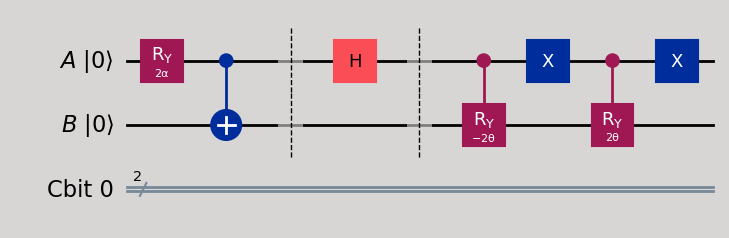

In [28]:
from qiskit.circuit import QuantumCircuit, Parameter, QuantumRegister, ClassicalRegister
def qet():
    A = QuantumRegister(1,"A")
    B = QuantumRegister(1,"B")
    C = ClassicalRegister(2,"Cbit")
    qc = QuantumCircuit(A,B,C)

    # Prepare ground state
    theta = Parameter('2α')


    qc.ry(theta,0)
    qc.cx(0,1)

    # Projective measurement on A*
    qc.barrier()
    qc.h(0)

    # Condicional operation on B
    qc.barrier()
    phi1 = Parameter('-2θ')
    phi2 = Parameter('2θ')

    qc.cry(phi1,0,1)

    qc.x(0)
    qc.cry(phi2,0,1)
    qc.x(0)

    return qc

qet().draw(output='mpl', plot_barriers=True, initial_state=True, style={'backgroundcolor':"#D8D5D5FF","barrierfacecolor": "#D8D5D5FF"})

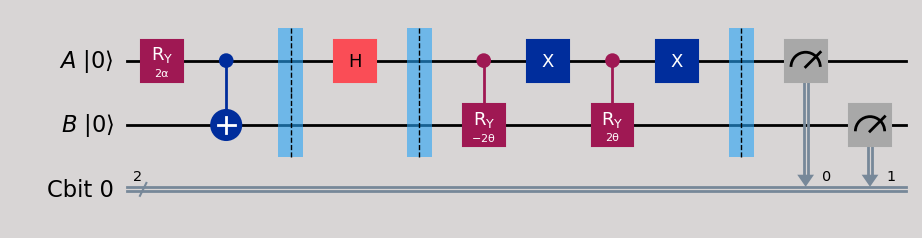

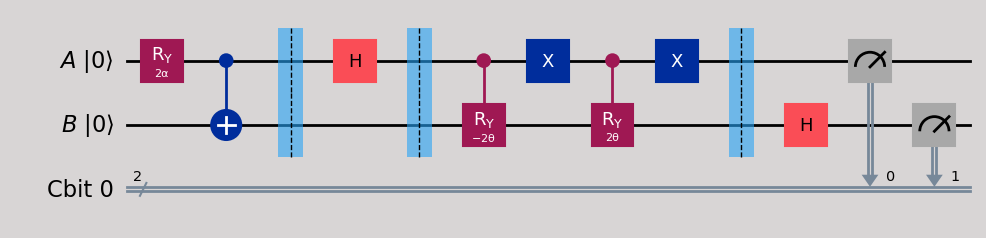

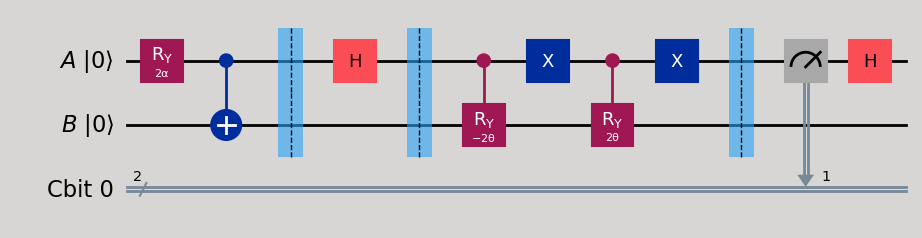

In [45]:
qc = qet()
qc.barrier()
qc.measure([0,1], [0,1])
display(qc.draw(output='mpl', plot_barriers=True, initial_state=True, style={'backgroundcolor':"#D8D5D5FF","barrierfacecolor": "#27A3F5"}))
qc = qet()
qc.barrier()
qc.h(1)
qc.measure([0,1], [0,1])
display(qc.draw(output='mpl', plot_barriers=True, initial_state=True, style={'backgroundcolor':"#D8D5D5FF","barrierfacecolor": "#27A3F5"}))
qc = qet()
qc.barrier()
qc.measure(0,1)
qc.h(0)
display(qc.draw(output='mpl', plot_barriers=True, initial_state=True, style={'backgroundcolor':"#D8D5D5FF","barrierfacecolor": "#27A3F5"}))

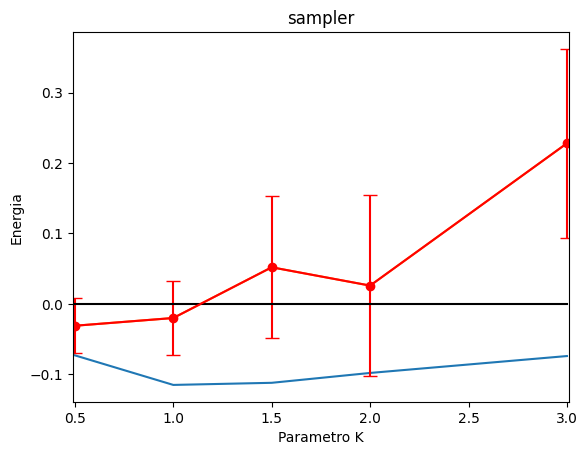

In [30]:
import numpy as np
import matplotlib.pyplot as plt 

k = np.array([3, 2, 1.5, 1, 0.5])
teorico = np.array([-0.074, -0.098, -0.112, -0.115,-0.073])
sampler = np.array([0.228, 0.026, 0.052, -0.020, -0.031])
sampler_erro = np.array([0.134, 0.128, 0.101, 0.052, 0.039])

plt.plot(k, teorico)
plt.plot(k, sampler)
plt.errorbar(k, sampler, yerr=sampler_erro, marker='o', capsize=5, capthick=1, color='red')
plt.plot(k, [0,0,0,0,0],'k-')
plt.xlabel("Parametro K")
plt.ylabel("Energia")
plt.xlim(0.49, 3.01)
plt.title('sampler')
plt.show()

# só um resultado bom pra k pequeno
# angulo maior quando k = h = 1

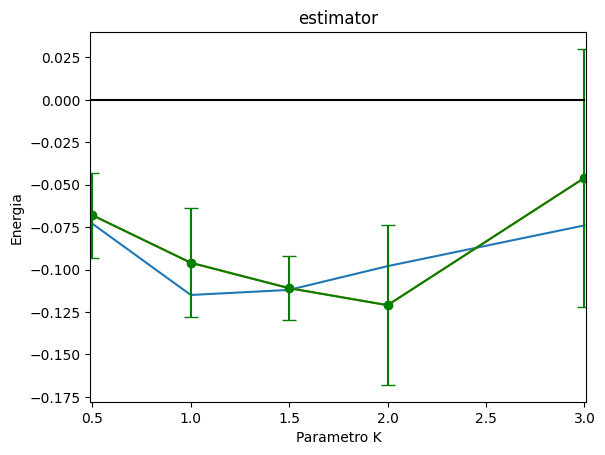

In [31]:
k = np.array([3, 2, 1.5, 1, 0.5])
teorico = np.array([-0.074, -0.098, -0.112, -0.115,-0.073])
estimator = np.array([-0.046, -0.121, -0.111, -0.096, -0.068])
estimator_erro = np.array([0.076, 0.047, 0.019, 0.032, 0.025])

plt.plot(k, teorico)
plt.plot(k, estimator)
plt.errorbar(k, estimator, yerr=estimator_erro, marker='o', capsize=5, capthick=1, color='green')
plt.plot(k, [0,0,0,0,0],'k-')
plt.xlabel("Parametro K")
plt.ylabel("Energia")
plt.xlim(0.49, 3.01)
plt.title('estimator')
plt.show()

# Resultados bons, mas aumenta a medida que k aumenta

H_B

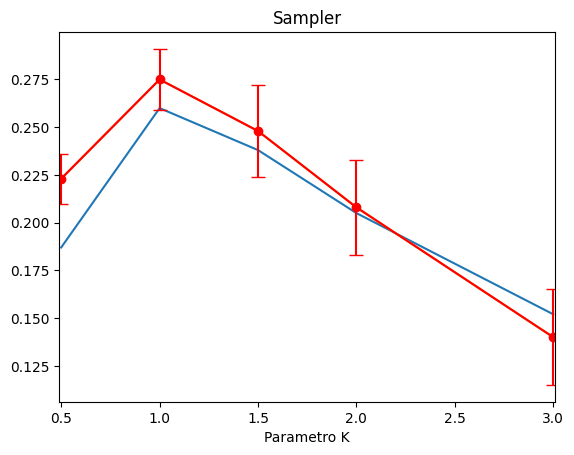

In [32]:
import numpy as np
import matplotlib.pyplot as plt 

k = np.array([3, 2, 1.5, 1, 0.5])
teorico = np.array([0.152, 0.205, 0.238, 0.260,0.187])
sampler = np.array([0.140,0.208,0.248,0.275,0.223])
sampler_erro = np.array([0.025,0.025,0.024,0.016,0.013])

plt.plot(k, teorico)
plt.plot(k, sampler)
plt.errorbar(k, sampler, yerr=sampler_erro, marker='o', capsize=5, capthick=1, color='red')
plt.xlabel("Parametro K")
plt.xlim(0.49, 3.01)
plt.title('Sampler')
plt.show()

# Resultados não estão ruins

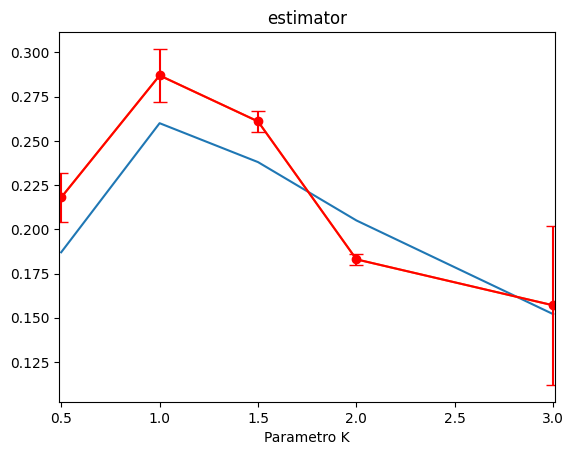

In [33]:
import numpy as np
import matplotlib.pyplot as plt 

k = np.array([3, 2, 1.5, 1, 0.5])
teorico = np.array([0.152, 0.205, 0.238, 0.260,0.187])
estimator= np.array([0.157,0.183,0.261,0.287,0.218])
estimator_erro = np.array([0.045,0.003,0.006,0.015,0.014])

plt.plot(k, teorico)
plt.plot(k, estimator)
plt.errorbar(k, estimator, yerr=estimator_erro, marker='o', capsize=5, capthick=1, color='red')
plt.xlabel("Parametro K")
plt.xlim(0.49, 3.01)
plt.title('estimator')
plt.show()

# Resultados até pior que sampler

V

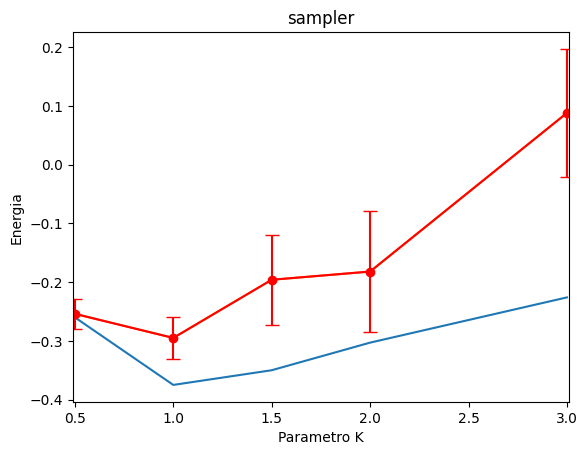

In [34]:
import numpy as np
import matplotlib.pyplot as plt 

k = np.array([3, 2, 1.5, 1, 0.5])
teorico = np.array([-0.226,-0.303,-0.350,-0.375,-0.260])
sampler = np.array([0.088,-0.182,-0.196,-0.295,-0.254])
sampler_erro = np.array([0.109,0.103,0.077,0.036,0.026])

plt.plot(k, teorico)
plt.plot(k, sampler)
plt.errorbar(k, sampler, yerr=sampler_erro, marker='o', capsize=5, capthick=1, color='red')
plt.xlabel("Parametro K")
plt.ylabel("Energia")
plt.xlim(0.49, 3.01)
plt.title('sampler')
plt.show()

# Resultados péssimos, piores a mediade que k aumenta
# V nos dois casos tem erro maior

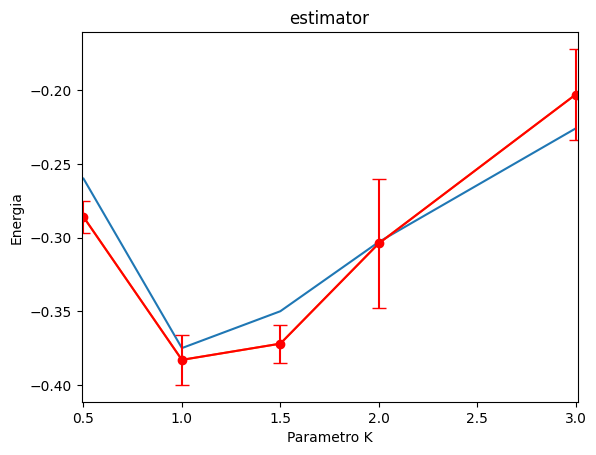

In [35]:
import numpy as np
import matplotlib.pyplot as plt 

k = np.array([3, 2, 1.5, 1, 0.5])
teorico = np.array([-0.226,-0.303,-0.350,-0.375,-0.260])
estimator = np.array([-0.203,-0.304,-0.372,-0.383,-0.286])
estimator_erro = np.array([0.031,0.044,0.013,0.017,0.011])

plt.plot(k, teorico)
plt.plot(k, estimator)
plt.errorbar(k, estimator, yerr=estimator_erro, marker='o', capsize=5, capthick=1, color='red')
plt.xlabel("Parametro K")
plt.ylabel("Energia")
plt.xlim(0.49, 3.01)
plt.title('estimator')
plt.show()

# resultados muito melhores

primeiro 

<>:21: SyntaxWarning: invalid escape sequence '\k'
<>:21: SyntaxWarning: invalid escape sequence '\k'
C:\Users\julio\AppData\Local\Temp\ipykernel_8136\3631630297.py:21: SyntaxWarning: invalid escape sequence '\k'
  plt.xlabel("$h/\kappa$")


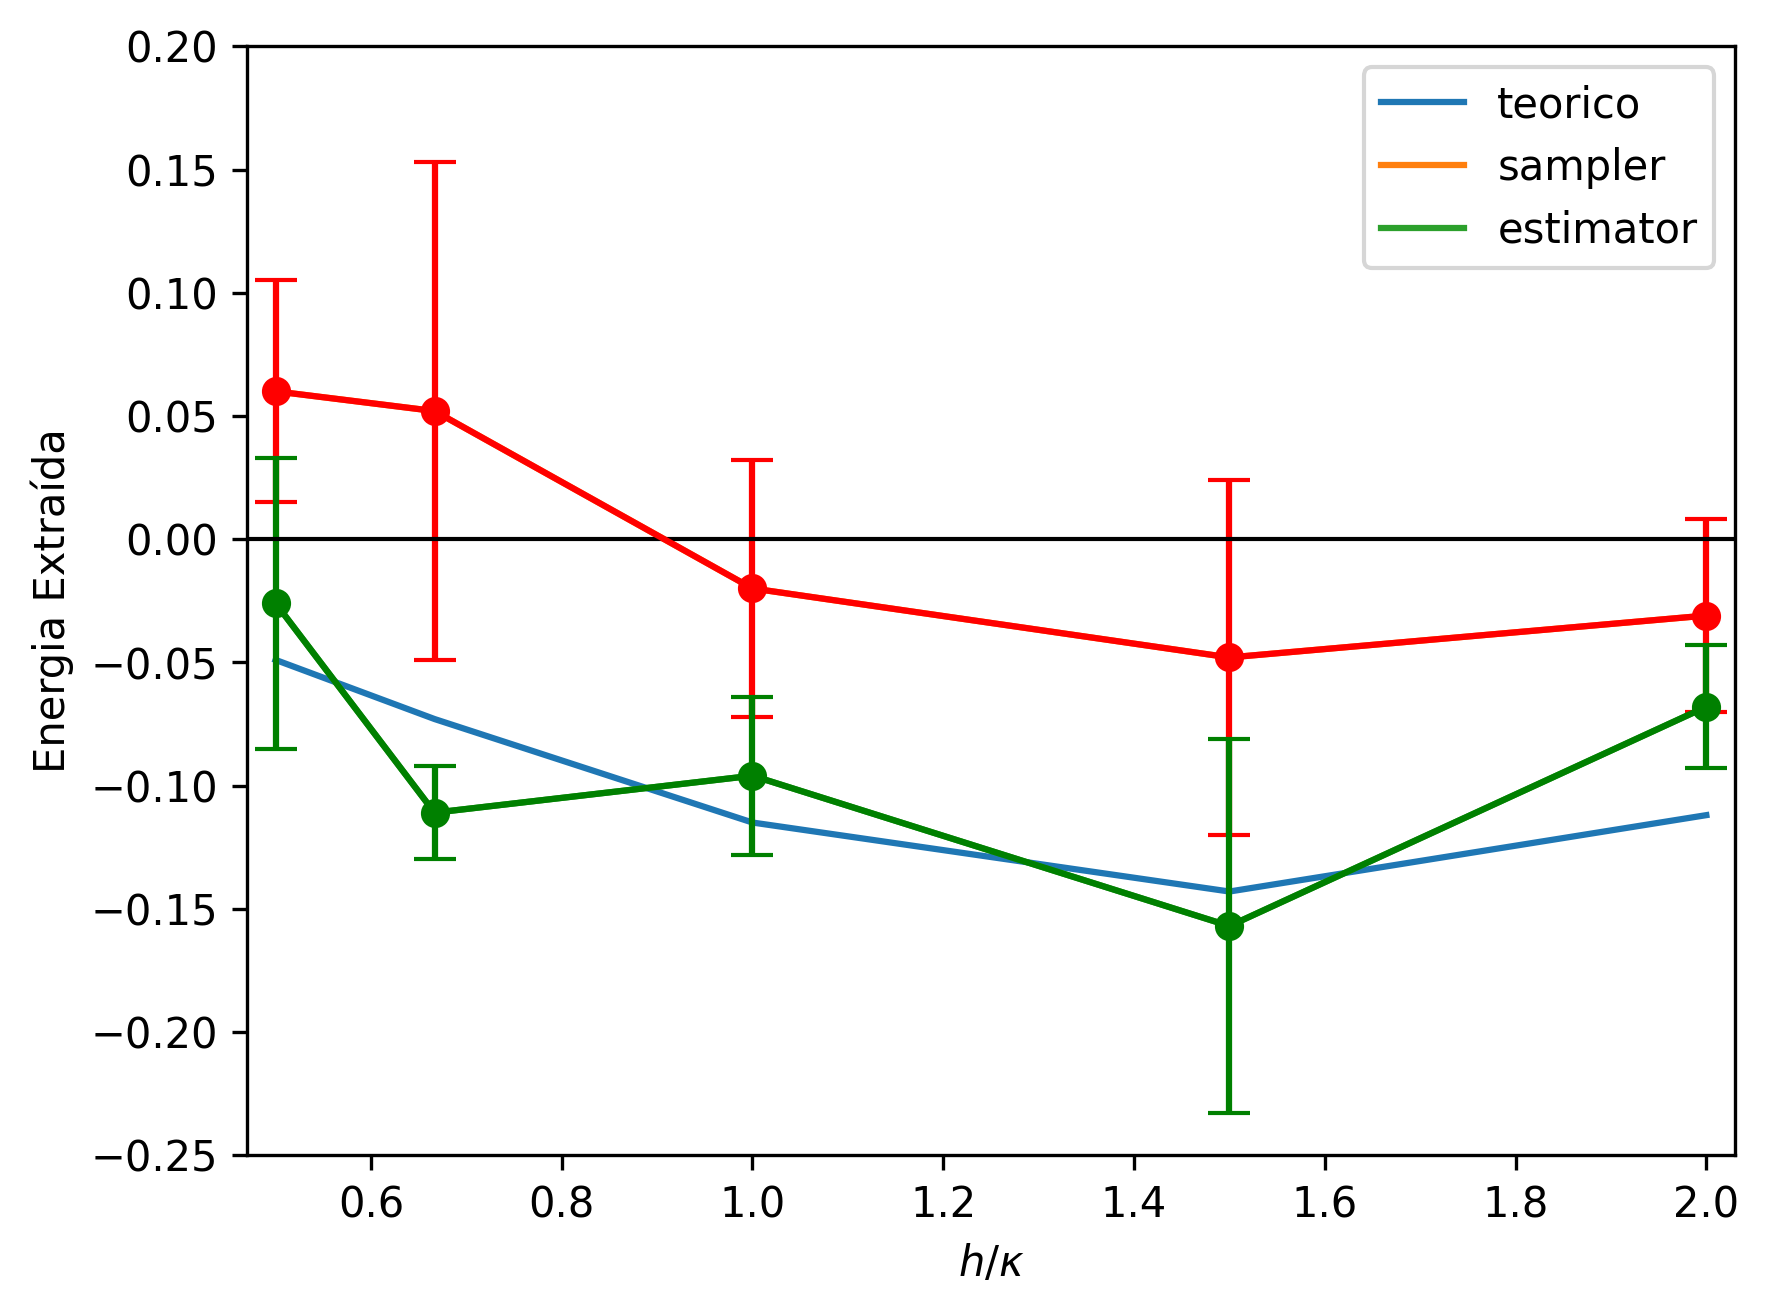

In [42]:
import numpy as np
import matplotlib.pyplot as plt 

ratio = np.array([0.5/1, 1/1.5, 1/1, 1.5/1, 1/0.5])
teorico = np.array([-0.049, -0.073, -0.115, -0.143, -0.112])
sampler = np.array([0.060, 0.052, -0.020, -0.048, -0.031])
sampler_erro = np.array([0.045, 0.101, 0.052,0.072, 0.039])
estimator = np.array([-0.026, -0.111, -0.096,-0.157, -0.068])
estimator_erro = np.array([0.059, 0.019, 0.032, 0.076, 0.025])

fig = plt.figure(dpi=300)
plt.plot(ratio, teorico)
plt.plot(ratio, sampler)
plt.plot(ratio,estimator)
plt.errorbar(ratio, sampler, yerr=sampler_erro, marker='o', capsize=5, capthick=1, color='red')
plt.errorbar(ratio, estimator, yerr=estimator_erro, marker='o', capsize=5, capthick=1, color='green')
plt.axhline(y=0, 
            color='black', 
            linestyle='-', 
            linewidth=1) 
plt.xlabel("$h/\kappa$")
plt.ylabel("Energia Extraída")
plt.xlim(0.47, 2.03)
plt.ylim(-0.25,0.20)
plt.legend(['teorico','sampler','estimator'])
plt.show()

# só um resultado bom pra k pequeno
# angulo maior quando k = h = 1

### Long Distance

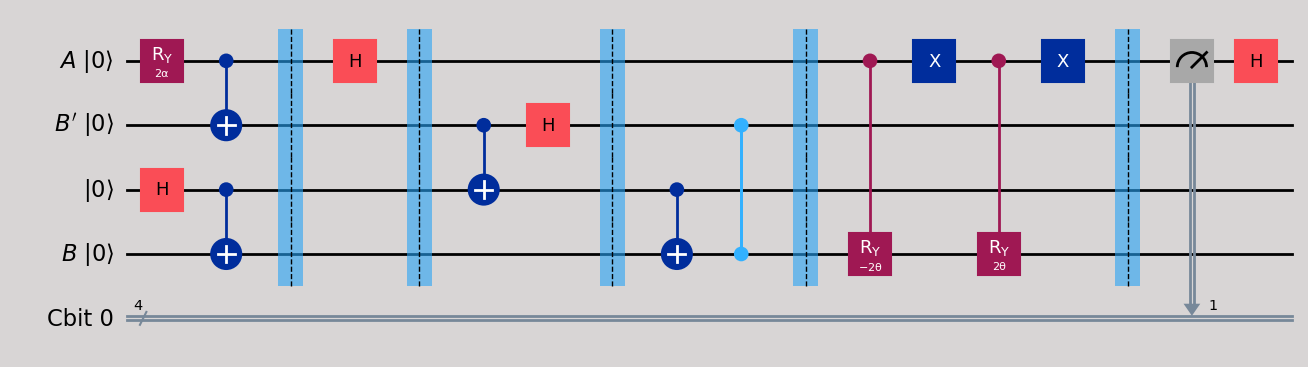

In [58]:
from qiskit import QuantumRegister, ClassicalRegister

A = QuantumRegister(1, 'A')
B_ = QuantumRegister(1, "B'")
C = QuantumRegister(1, "")
B = QuantumRegister(1, "B")
D = ClassicalRegister(4, "Cbit")
qc = QuantumCircuit(A,B_,C,B,D)

#Prepare the ground state
theta = Parameter('2α')

qc.ry(theta,0)
qc.cx(0,1)
qc.h(2)
qc.cx(2,3)

# Alice's projective measurement
qc.barrier()
qc.h(0)

# Prepare state for teleportation
qc.barrier()
qc.cx(1,2)
qc.h(1)

# Condicional operation for state teleportation
qc.barrier()
qc.cx(2,3)
qc.cz(1,3)

# Energy extraction conditional operations on teleported state
qc.barrier()
phi1 = Parameter('-2θ')
phi2 = Parameter('2θ')

qc.cry(phi1,0,3)

qc.x(0)
qc.cry(phi2,0,3)
qc.x(0)

qc.barrier()
qc.measure(0,1)
qc.h(0)

qc.draw(output='mpl', plot_barriers=True, initial_state=True, style={'backgroundcolor':"#D8D5D5FF","barrierfacecolor": "#27A3F5"})

### Energy Storage

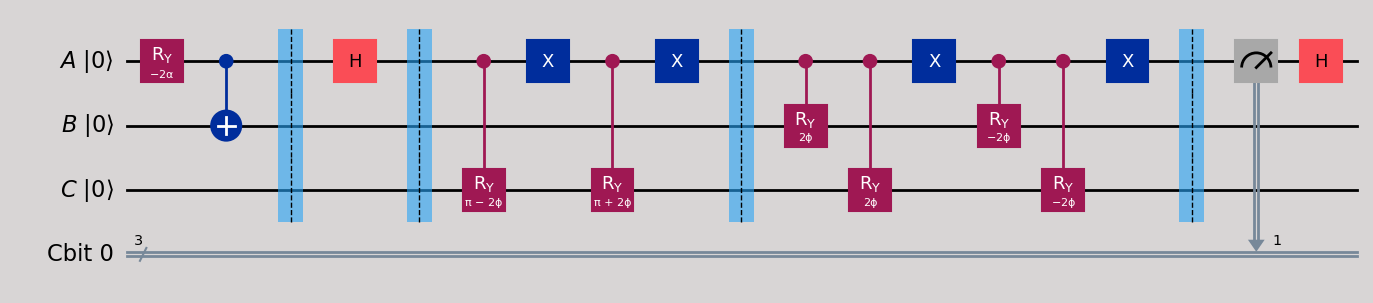

In [49]:
from qiskit.circuit import QuantumCircuit, Parameter, QuantumRegister, ClassicalRegister

A = QuantumRegister(1,"A")
B = QuantumRegister(1,"B")
C = QuantumRegister(1,"C")
D = ClassicalRegister(3,"Cbit")
qc = QuantumCircuit(A,B,C,D)

# Prepare ground state
theta = Parameter('-2α')

qc.ry(theta,0)
qc.cx(0,1)
qc.barrier()

# Alice's projective measurement
qc.h(0)
qc.barrier()

# Charlie prepare qubit C
phi0 = Parameter('π - 2ϕ')
phi1 = Parameter('π + 2ϕ')
phi2 = Parameter('2ϕ')
phi3 = Parameter('-2ϕ')

qc.cry(phi0,0,2)

qc.x(0)
qc.cry(phi1,0,2)
qc.x(0)
qc.barrier()

#Bob's conditional operation
qc.cry(phi2,0,1)
qc.cry(phi2,0,2)

qc.x(0)
qc.cry(phi3,0,1)
qc.cry(phi3,0,2)
qc.x(0)

qc.barrier()
qc.measure(0,1)
qc.h(0)

qc.draw(output='mpl', plot_barriers=True, initial_state=True, style={'backgroundcolor':"#D8D5D5FF","barrierfacecolor": "#27A3F5"})

In [ ]:
# energia extraida
import numpy as np
ratio = np.array([0.5/1, 1/1.5, 1/1, 1.5/1, 1/0.5])
teorico = np.array([-0.049, -0.112, -0.115, -0.143, -0.073])
sampler = np.array([0.163, 0.121, 0.097, 0.088, 0.032])
sampler_error = np.array([0.018, 0.036, 0.034, 0.047, 0.029])
estimator = np.array([-0.140, -0.118, -0.067, -0.079, -0.007])
estimator_error = np.array([0.084, 0.143, 0.040, 0.102, 0.029])

<>:13: SyntaxWarning: invalid escape sequence '\k'
<>:13: SyntaxWarning: invalid escape sequence '\k'
C:\Users\julio\AppData\Local\Temp\ipykernel_8136\2376746269.py:13: SyntaxWarning: invalid escape sequence '\k'
  plt.xlabel("$h/\kappa$")


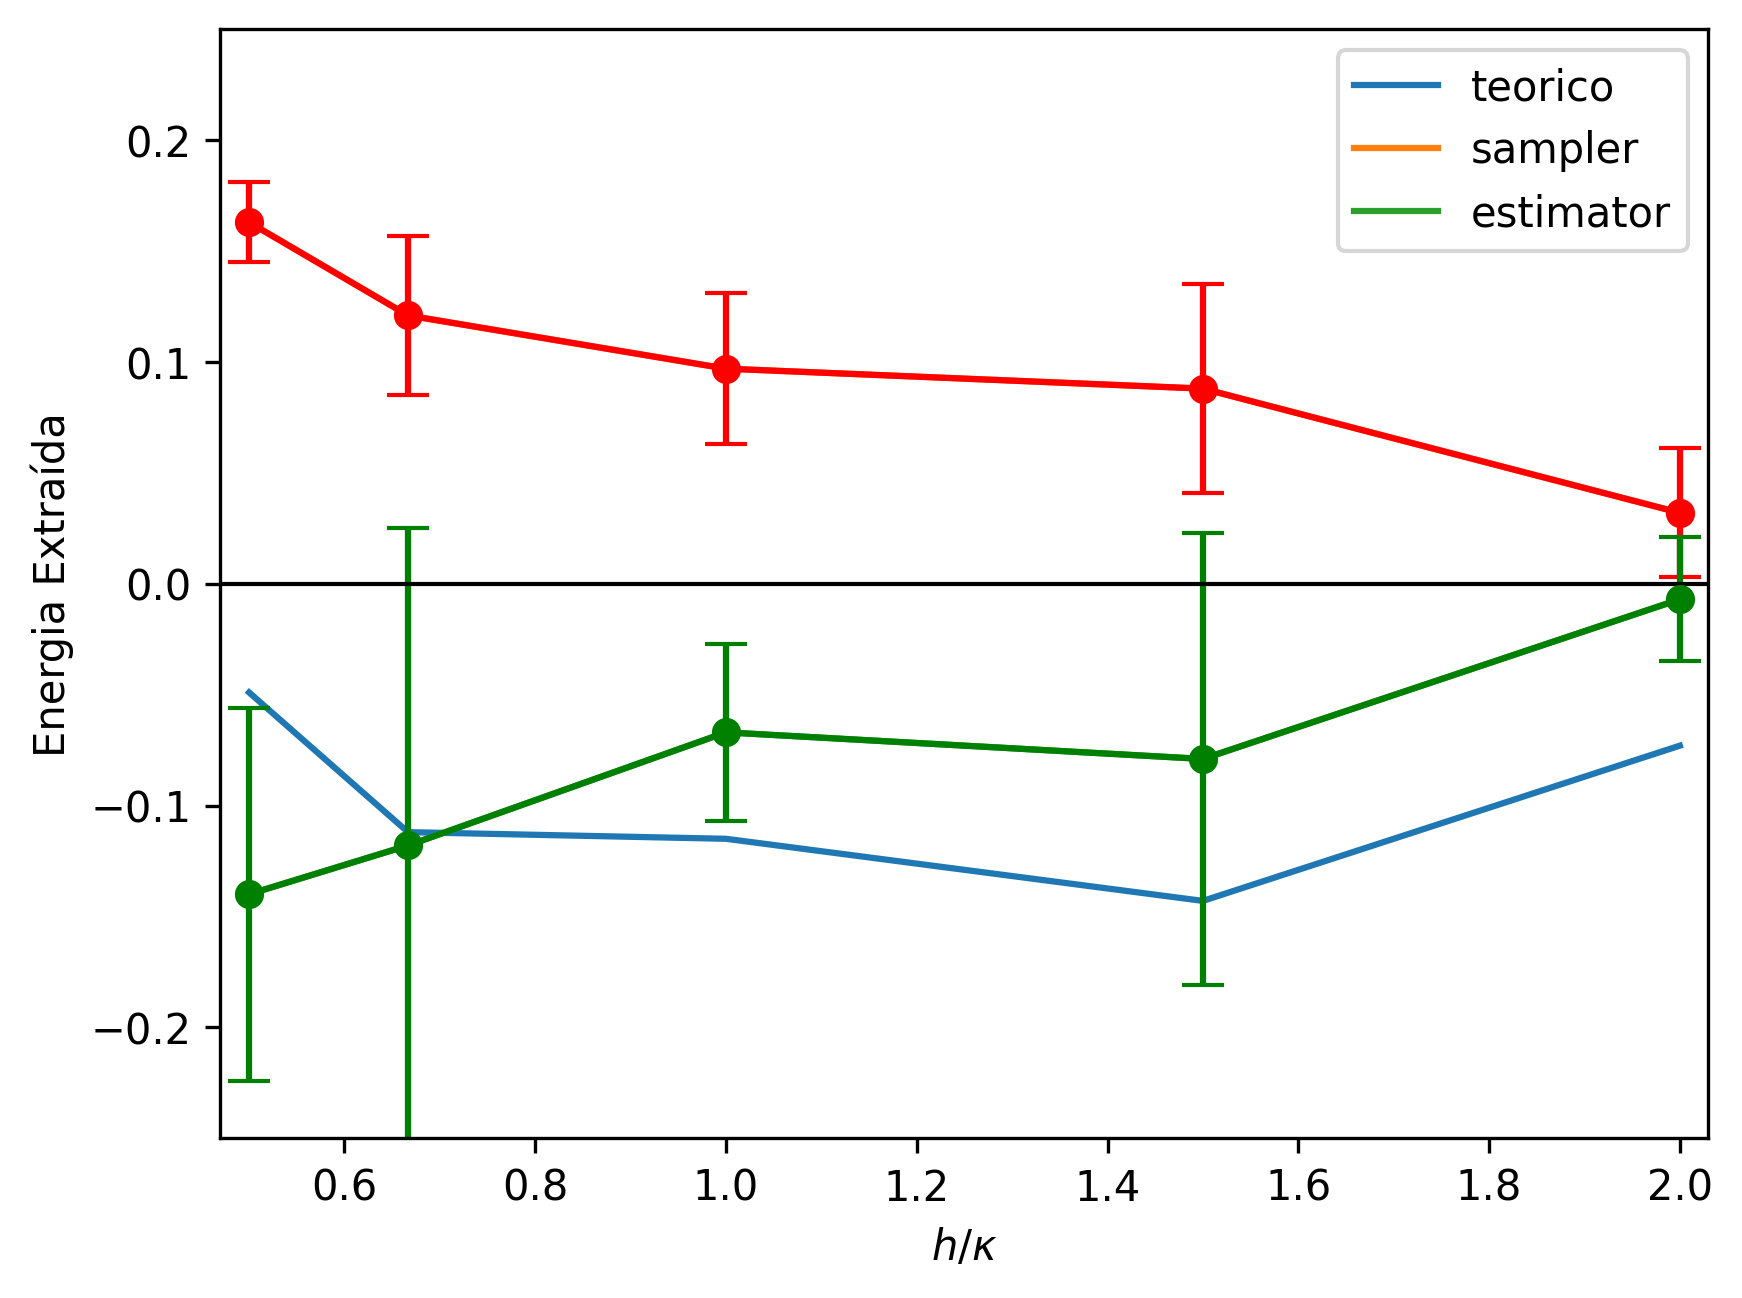

In [41]:
import matplotlib.pyplot as plt

fig = plt.figure(dpi=300) 
plt.plot(ratio, teorico)
plt.plot(ratio, sampler)
plt.plot(ratio,estimator)
plt.errorbar(ratio, sampler, yerr=sampler_error, marker='o', capsize=5, capthick=1, color='red')
plt.errorbar(ratio, estimator, yerr=estimator_error, marker='o', capsize=5, capthick=1, color='green')
plt.axhline(y=0, 
            color='black', 
            linestyle='-', 
            linewidth=1) 
plt.xlabel("$h/\kappa$")
plt.ylabel("Energia Extraída")
plt.xlim(0.47, 2.03)
plt.ylim(-0.25,0.25)
plt.legend(['teorico','sampler','estimator'])
plt.show()


<>:21: SyntaxWarning: invalid escape sequence '\k'
<>:21: SyntaxWarning: invalid escape sequence '\k'
C:\Users\julio\AppData\Local\Temp\ipykernel_8136\2367486259.py:21: SyntaxWarning: invalid escape sequence '\k'
  plt.xlabel("$h/\kappa$")


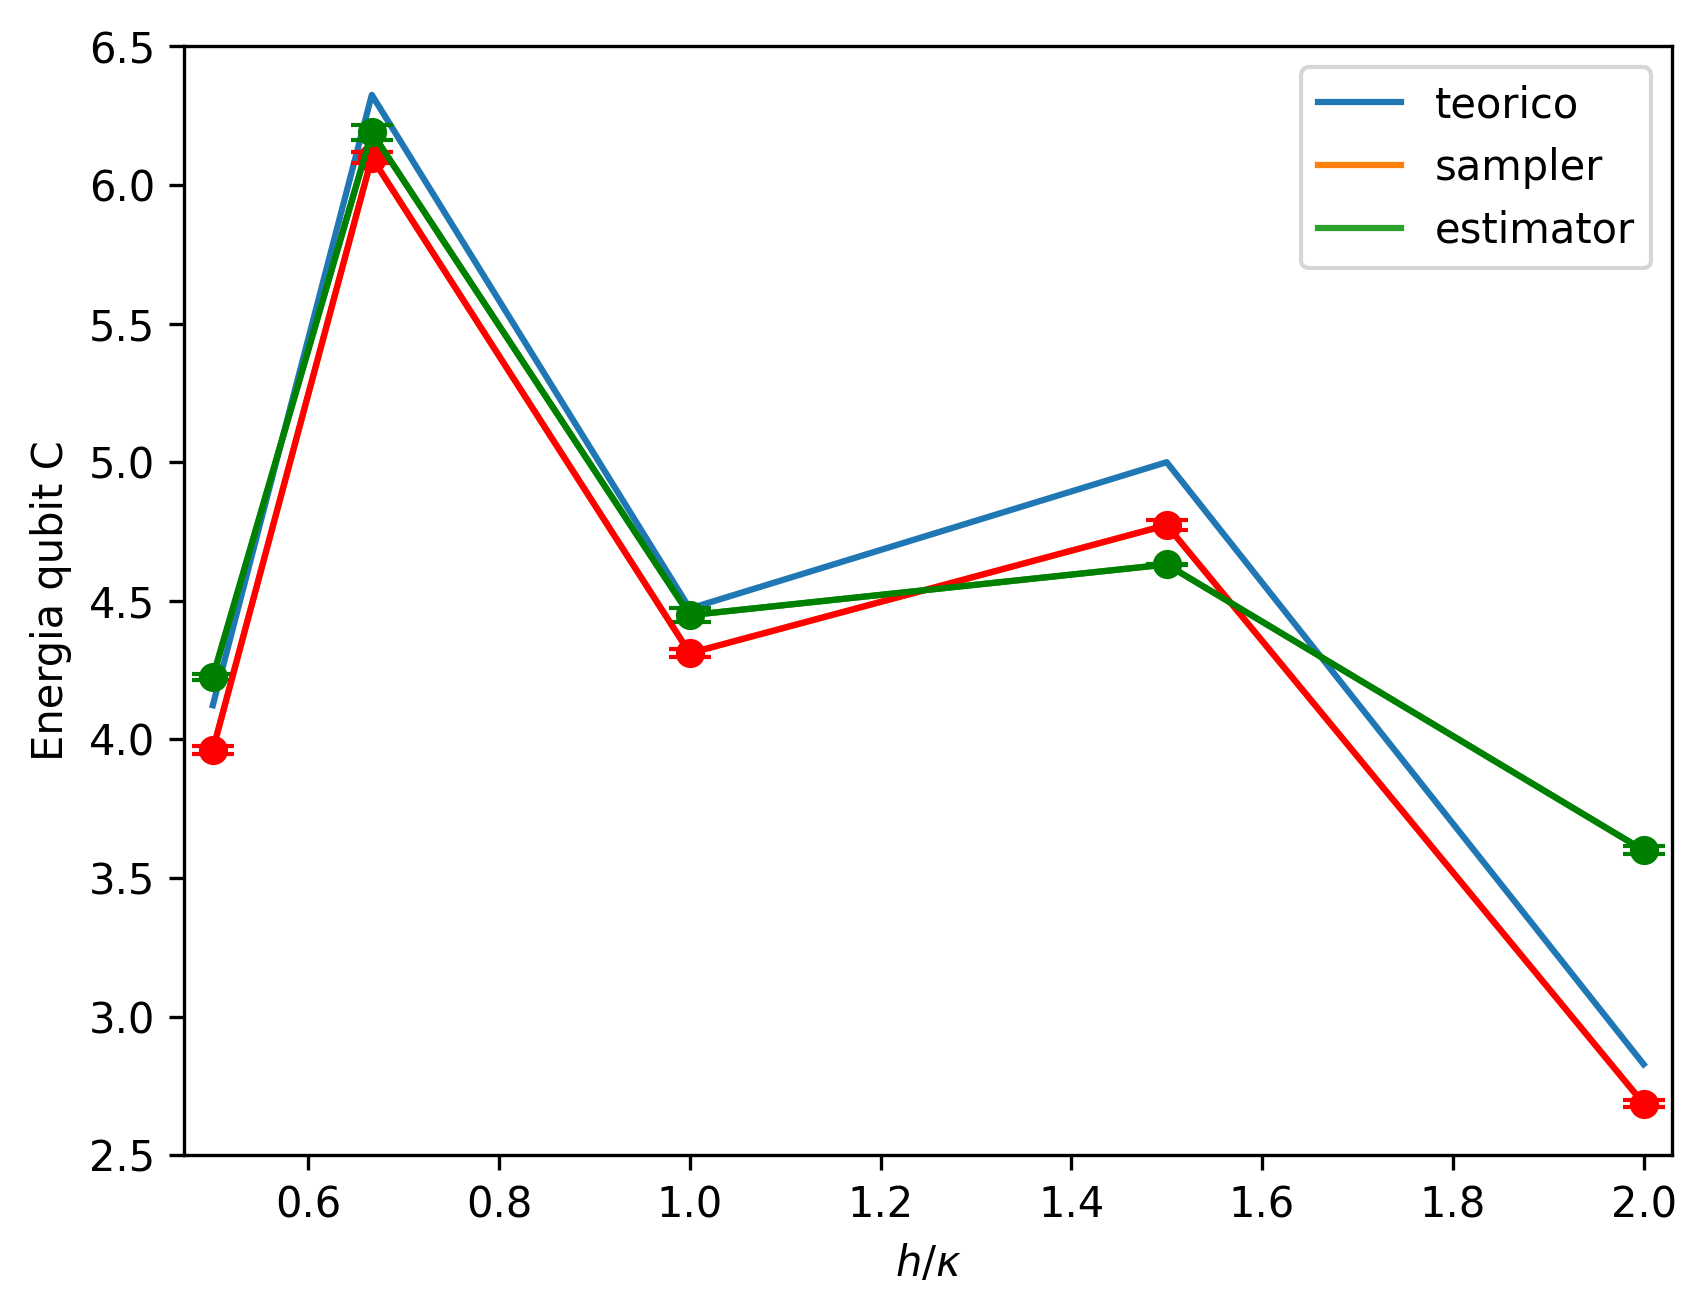

In [44]:
import matplotlib.pyplot as plt
import numpy as np

ratio = np.array([0.5/1, 1/1.5, 1/1, 1.5/1, 1/0.5])
teorico = np.array([4.123, 6.325, 4.472, 5.000, 2.828])
sampler = np.array([3.962, 6.099, 4.311, 4.773, 2.686])
sampler_error = np.array([0.015, 0.021, 0.015, 0.019, 0.014])
estimator = np.array([4.225, 6.190, 4.448, 4.631, 3.600])
estimator_error = np.array([0.012, 0.028, 0.025, 0.001, 0.015])

fig = plt.figure(dpi=300) 
plt.plot(ratio, teorico)
plt.plot(ratio, sampler)
plt.plot(ratio,estimator)
plt.errorbar(ratio, sampler, yerr=sampler_error, marker='o', capsize=5, capthick=1, color='red')
plt.errorbar(ratio, estimator, yerr=estimator_error, marker='o', capsize=5, capthick=1, color='green')
plt.axhline(y=0, 
            color='black', 
            linestyle='-', 
            linewidth=1) 
plt.xlabel("$h/\kappa$")
plt.ylabel("Energia qubit C")
plt.xlim(0.47, 2.03)
plt.ylim(2.5,6.5)
plt.legend(['teorico','sampler','estimator'])
plt.show()

### No constraint

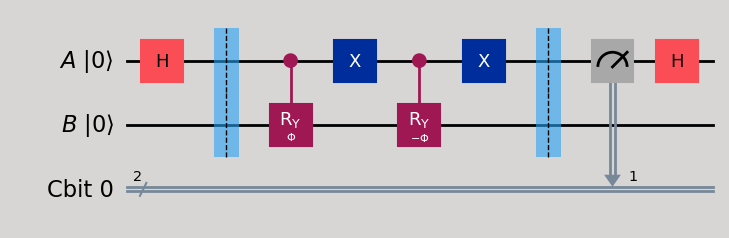

In [53]:
from qiskit import QuantumRegister, ClassicalRegister
def qet(h,k):

    # generate circuit
    A = QuantumRegister(1, 'A')
    B = QuantumRegister(1, "B")
    C = ClassicalRegister(2, "Cbit")
    qc = QuantumCircuit(A,B,C, metadata={'h':h, 'k':k})

    # Measrument*
    qc.h(0)

    

    # Conditional Operations 
    
    qc.barrier()
    theta = Parameter('Φ')
    #theta = np.arctan2(k,h)

    qc.cry(theta,0,1)
    qc.x(0)
    qc.cry(-theta,0,1)
    qc.x(0)
    qc.barrier()
    qc.measure(0,1)
    qc.h(0)
    return qc
qet(1,1).draw(output='mpl', plot_barriers=True, initial_state=True, style={'backgroundcolor':"#D8D5D5FF","barrierfacecolor": "#27A3F5"})